# Introduction

In this notebook I will be looking into and analyzing the top 100 track on Spotify in 2018.
The data set I will be using can be found at : https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018/kernels?sortBy=hotness&group=everyone&pageSize=20&datasetId=116709


The audio features for each song were extracted using the Spotify Web API and the spotipy Python library. Credit goes to Spotify for calculating the audio feature values.

### Data Description:
There is one .csv file in the dataset. (top2018.csv) This file includes:

Spotify URI for the song
Name of the song
Artist(s) of the song
Audio features for the song (such as danceability, tempo, key etc.)
A more detailed explanation of the audio features can be found in the Metadata tab.

### Goals
The Goals of this analysis is to find what features of music make it more likely to be in the top 100 for a given year. This could inform artists of what qualities in music listeners find more preferential. 

# Inital imports 

In [72]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns

from scipy.stats import norm

In [73]:
df = pd.read_csv('top2018.csv')

# Feature Explanations

id - 
Spotify URI of the song

name - 
Name of the song

artists
Artist(s) of the song

danceability-
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy 
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

key
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

loudness
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

mode
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

speechiness
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

acousticness
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

instrumentalness
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

tempo
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
duration_msThe duration of the track in milliseconds.

time_signatureAn estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

# Data 
Here is our inital view of the first 5 rows raw data 

In [74]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


# Reasoning behind these particular columns
Dansibility- people like music that they can dance to
Energy- this ties into dansibility
Key - Maybe some keys are more popular than other in top music

In [75]:
# Columsns to drop 'id','name','artisit','mode','acousticness','liveness'
#df.drop(columns = ['id','name','artists','mode','acousticness','liveness']) 

In [76]:
#Round tempo. Music usually has whole numbers for tempo
df['tempo'] = df['tempo'].apply(round)

In [77]:
# value check
#df['tempo']

In [78]:
# Check if there's any null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null int64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(12), int64(1), object(3)
memory usage: 12.6+ KB


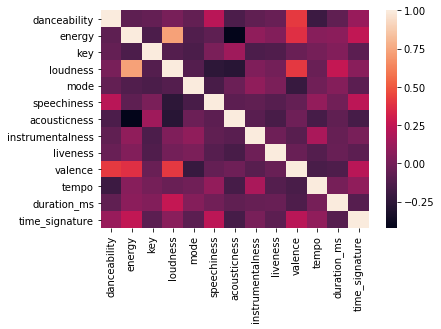

In [79]:
# Heatmap
ax = sns.heatmap(df.corr())

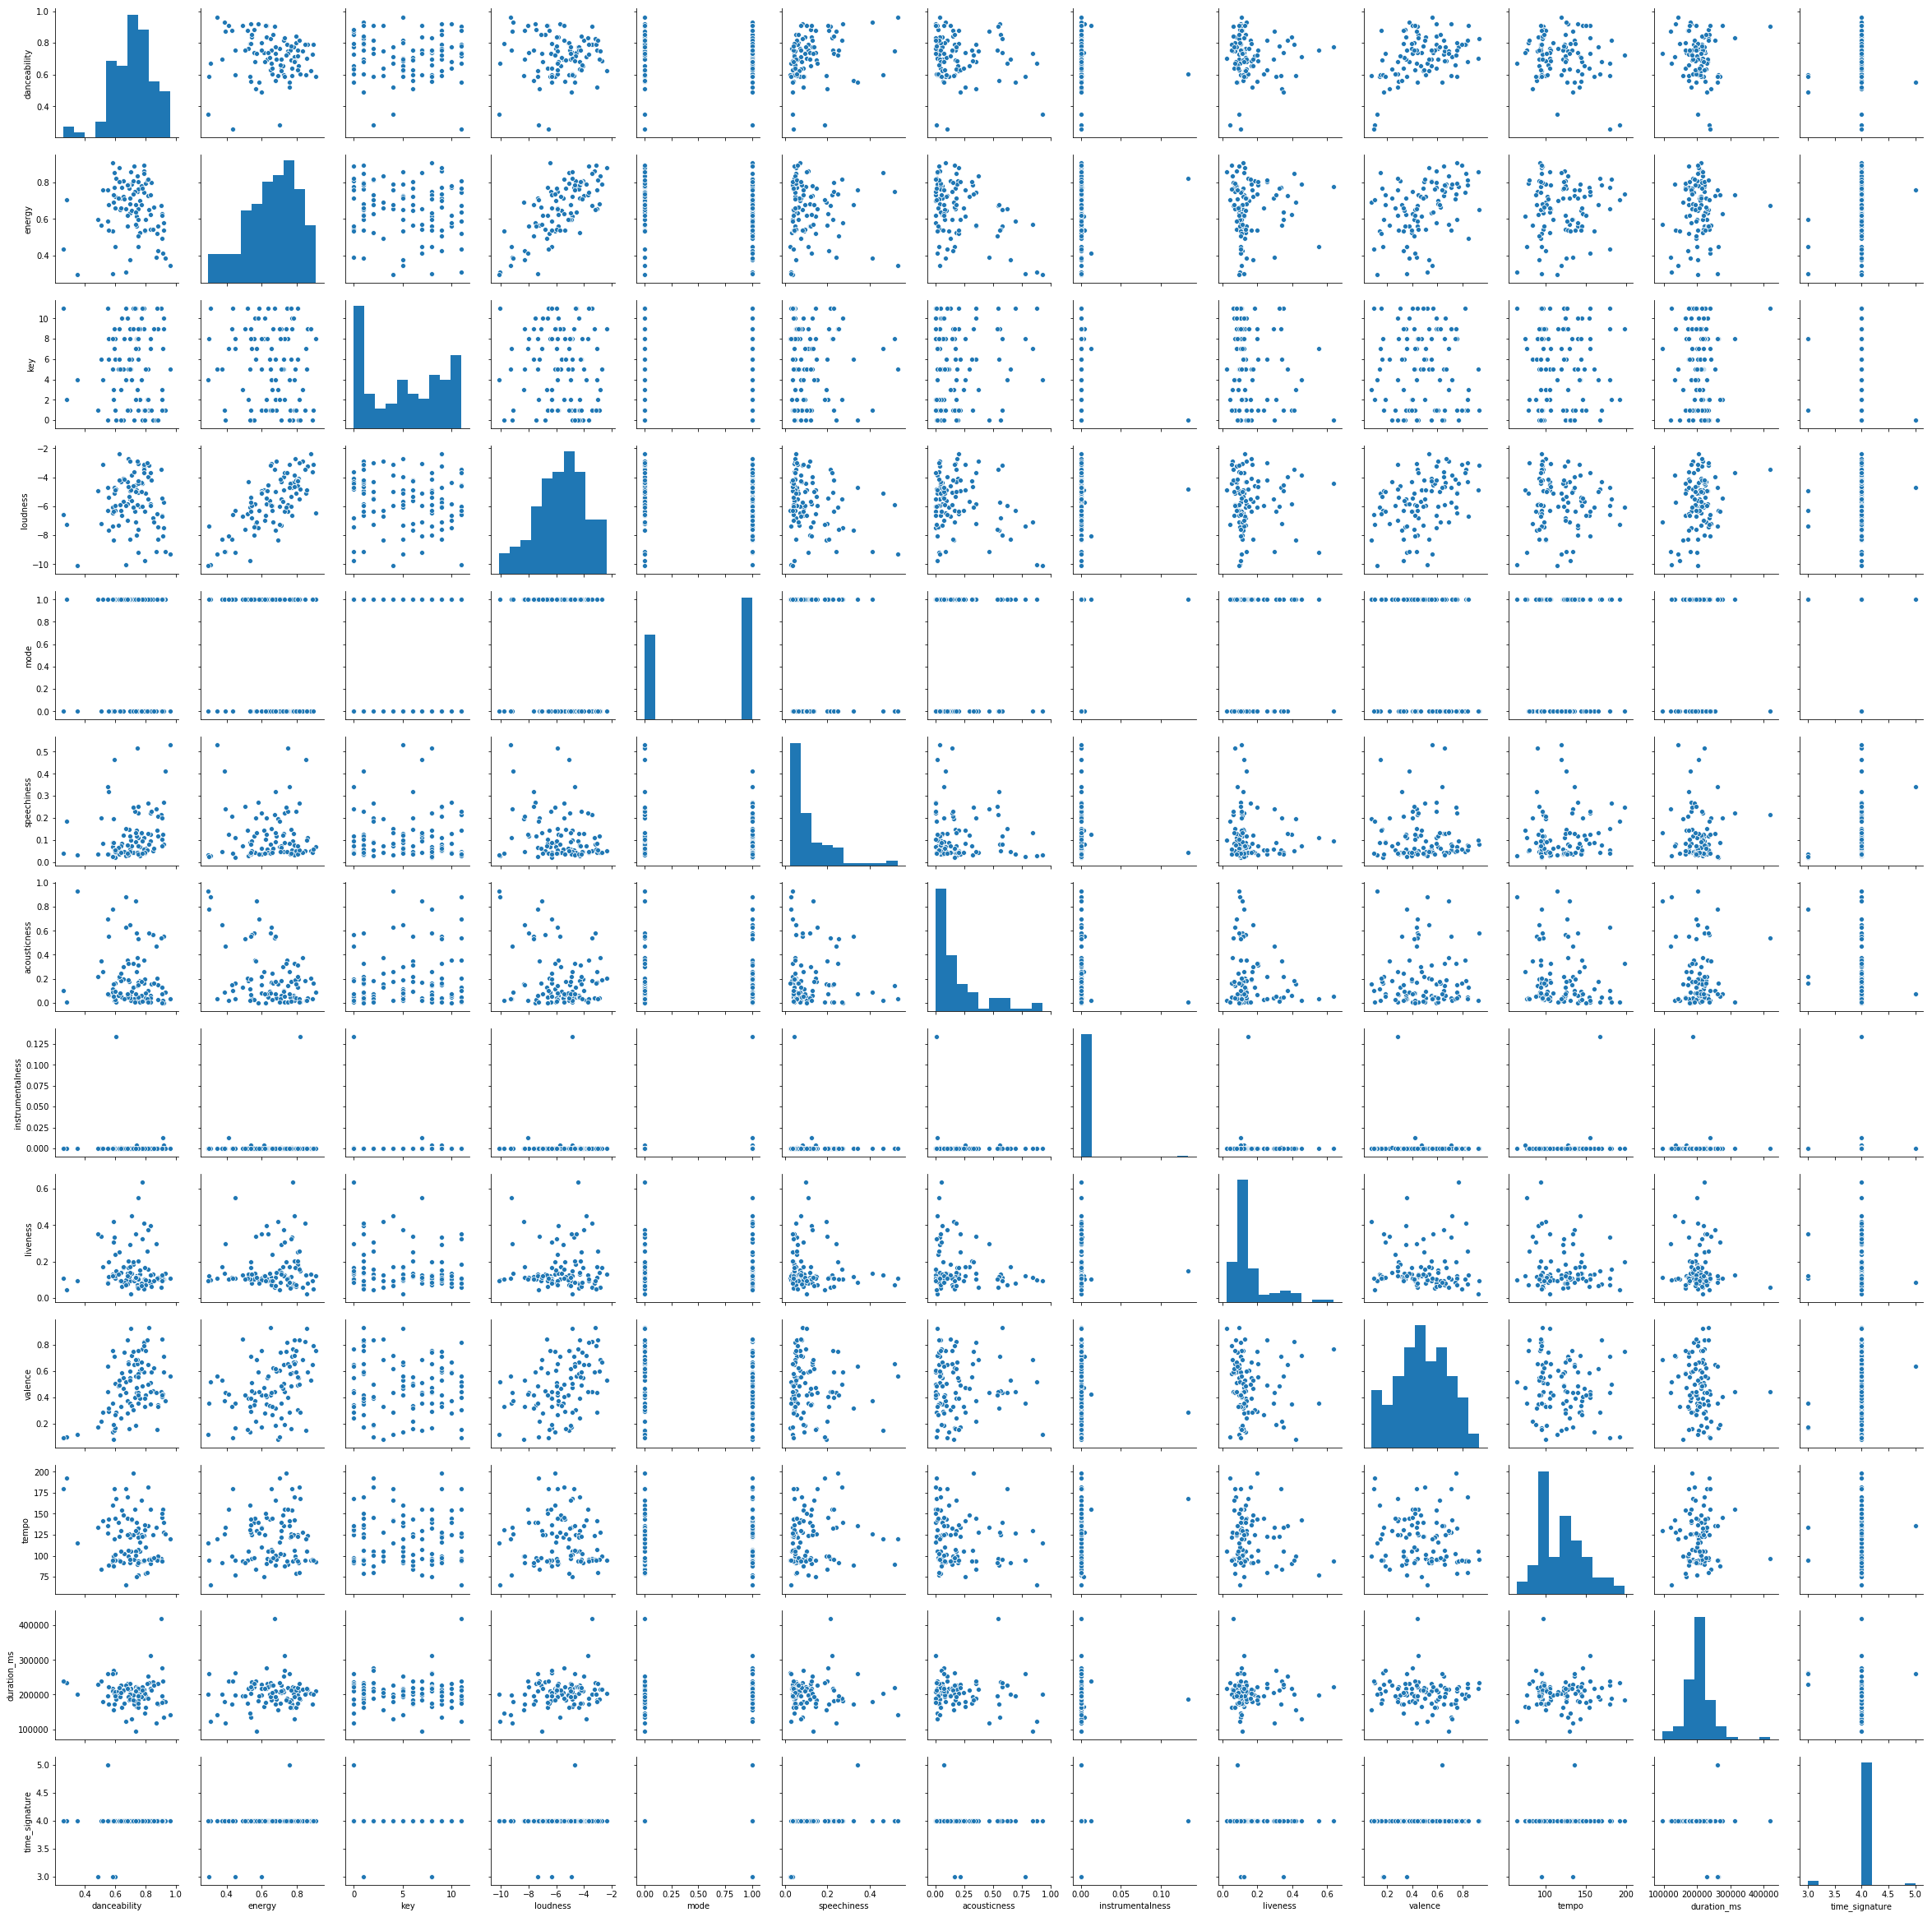

In [80]:
#Correlation matrix
sns.pairplot(df)
# with regression
#sns.pairplot(df, kind="reg")


plt.show()

# Possible correlations
From both the heatmap and correlational matrix above, it appears that the folling features may have correlation with one another

Dancibility X Valence,  
Energy X Loudness,  
Loudness X Valence

## Feature Explanation 
According to Spotify's explanation of the features
### Danceability
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
### Energy
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

### Loudness 
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

### Valence 
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

First I'll see how the distribution of each indicudual feature looks. 

In [81]:
def hist_plot (fet) :
    #dance = df['danceability']
    nm = fet.name
    # Plot the histogram.
    dnc = plt.hist(fet, bins='auto')
    plt.grid(axis='y', alpha=0.75)
    plt.title( nm +" distribution")
    plt.show()

In [ ]:
Dance = df['danceability']
Energy = df['energy']
Valence = df['valence']
Loud = df['loudness']

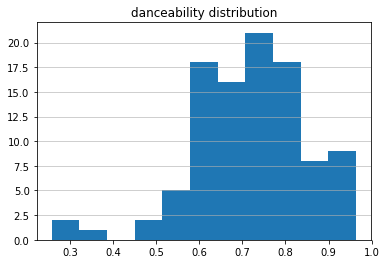

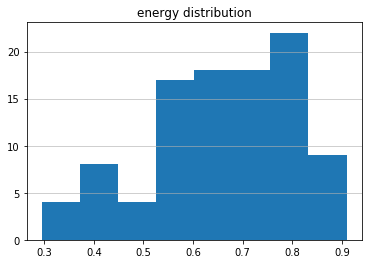

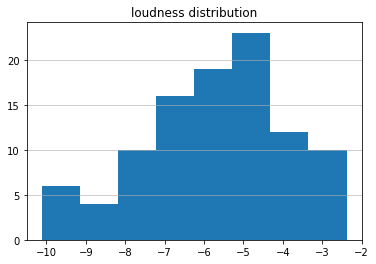

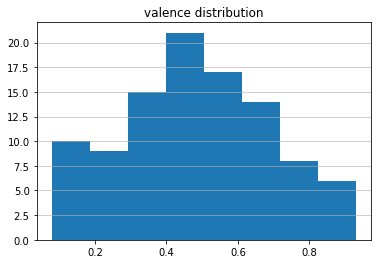

In [88]:
hist_plot(Dance)
hist_plot(Energy)
hist_plot(Loud)
hist_plot(Valence)


Based on the hisograms presented, dancibility, energy and loudness are negatively skewed. This clearly shows that the top tracks on Spotify in 2018 tended to be more dancible, energetic and loud. Valence appears to retun a more normal distribution. 

Now we can create a scatterplot and linear regression of the features that showed the best correlations

In [89]:
#takes in 2 features(columns)
def reg_plot(fet1,fet2) :
    scat = plt.scatter(fet1,fet2)
    #Names of features
    nm1 = fet1.name
    nm2 = fet2.name
    plt.title( nm1 +" X " + nm2)
    plt.xlabel(nm1)
    plt.ylabel(nm2)

    # linear regression 
    # m and b 
    fit = np.polyfit(fet1,fet2,1)
    m = fit[0]
    b = fit[1]
    #print(fit)

    #plot regression
    plt.plot(fet1,m*fet1+b, color='darkblue', linewidth=2)



    plt.show()

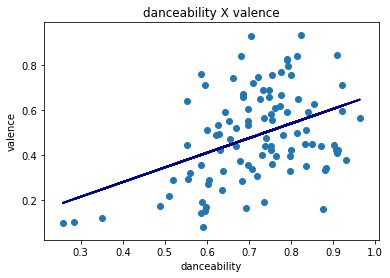

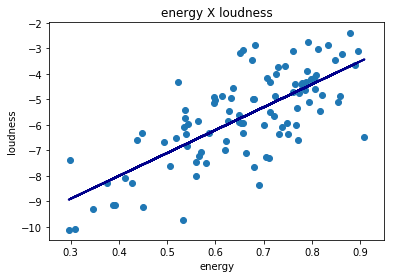

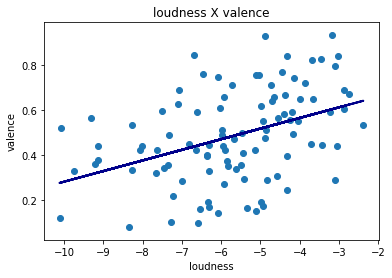

In [90]:
reg_plot(Dance, Valence)
reg_plot(Energy, Loud)
reg_plot(Loud,Valence)

The above graphs show that these features have positibe correlations between each of them. 

Our first graph informs us music dancibility increases, so does its positivity. 
Our second graph informs us as energy increases, so does the loudness.
Our third graph informs us that aas loudnes increases so does its positivity. 

In summary, these features inform us that the top tracks of spotify 2018 tend to contain more dancible,loud,energetic and positive

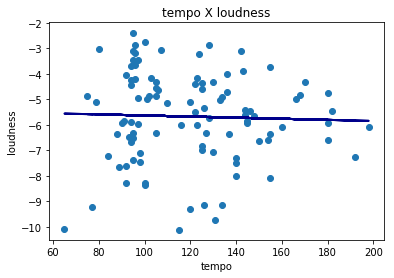

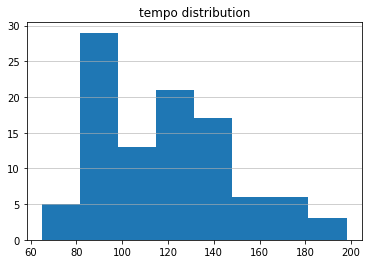

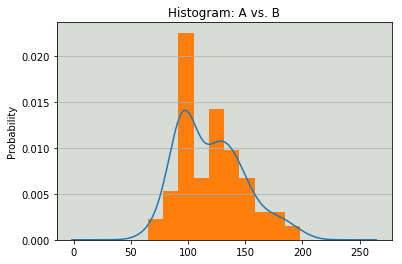

In [87]:
hist_plot(df['tempo'])
fig, ax = plt.subplots()
tempo.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
tempo.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')


In [92]:
df

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.033200,0.000083,0.5520,0.3570,77,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.258000,0.003720,0.1230,0.4730,75,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.117000,0.000066,0.1310,0.1400,160,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.580000,0.000000,0.1120,0.4390,140,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.058900,0.000060,0.3960,0.3500,91,217925.0,4.0
5,7dt6x5M1jzdTEt8oCbisT,Better Now,Post Malone,0.680,0.563,10.0,-5.843,1.0,0.0454,0.354000,0.000000,0.1360,0.3740,145,231267.0,4.0
6,58q2HKrzhC3ozto2nDdN4,I Like It,Cardi B,0.816,0.726,5.0,-3.998,0.0,0.1290,0.099000,0.000000,0.3720,0.6500,136,253390.0,4.0
7,7ef4DlsgrMEH11cDZd32M,One Kiss (with Dua Lipa),Calvin Harris,0.791,0.862,9.0,-3.240,0.0,0.1100,0.037000,0.000022,0.0814,0.5920,124,214847.0,4.0
8,76cy1WJvNGJTj78UqeA5z,IDGAF,Dua Lipa,0.836,0.544,7.0,-5.975,1.0,0.0943,0.040300,0.000000,0.0824,0.5100,97,217947.0,4.0
9,08bNPGLD8AhKpnnERrAc6,FRIENDS,Marshmello,0.626,0.880,9.0,-2.384,0.0,0.0504,0.205000,0.000000,0.1280,0.5340,95,202621.0,4.0
